In [1]:
import os
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

## Stylesheet for consistency

In [2]:
plt.style.use('../../supplimentary_material/plotting_style_sheet.txt')

## Generates lists of data files

In [3]:
scintx_mu = sorted(glob('Grant_Data/scintX_MACs/*'))
water_mu = sorted(glob('Grant_Data/water_MACs/*'))

In [4]:
Xenergies = list()
Xattenuations = list()

for file in scintx_mu:
    energy = os.path.basename(file).rstrip('.txt').split('_')[0]
    Xenergies.append(float(energy))
    μ = np.loadtxt(file)
    Xattenuations.append(μ)
    
Wenergies = list()
Wattenuations = list()

for file in water_mu:
    energy = os.path.basename(file).rstrip('.txt').split('_')[0]
    Wenergies.append(float(energy))
    μ = np.loadtxt(file)
    Wattenuations.append(μ)

In [5]:
df = pd.read_csv('Grant_Data_updated/nist_water_MACs/nist_water.txt', delim_whitespace=True)
df.head()

,Energy,u/p,uen/p
0,0.001,4078.00,4065.00
1,0.002,617.30,615.20
2,0.003,192.90,191.70
3,0.004,82.78,81.91
4,0.005,42.58,41.88


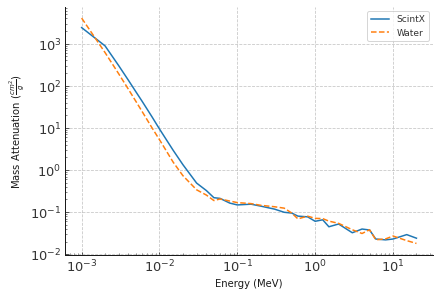

In [6]:
fig = plt.figure(facecolor='white', constrained_layout=True)

plt.loglog(Xenergies, Xattenuations, ls='solid', label='ScintX')
plt.loglog(Wenergies, Wattenuations, ls='dashed', label='Water')
#plt.loglog(df['Energy'], df['u/p'])
#           #marker='o',
#           mfc='black',
#           linestyle='dotted',
#           #ms=3.5,
#           label='NIST Water')
plt.legend(prop={'size':9})
plt.ylabel(r'Mass Attenuation ($\frac{cm^2}{g}$)')
plt.xlabel('Energy (MeV)')
#plt.title('Mass Attenuation values')
plt.show()

fig.savefig('../../figures/mass_attenuation/mass_attenuation.pdf')

# Determines mean squared error between water and ScintX and NIST

The simulations of our mass attenuation were performed at the same energies (x values). This allows us to compare the y values without having to do a curve fit to interpolate missing values.

In [7]:
mean_squared_error(y_true=df['u/p'], y_pred=Xattenuations)

81228.53007593485

In [8]:
mean_squared_error(y_true=Wattenuations, y_pred=Xattenuations)

80842.86622202607

In [9]:
nist_to_water = mean_squared_error(y_true=df['u/p'], y_pred=Wattenuations)
print(f'water error compared to NIST {nist_to_water:.3f}')

water error compared to NIST 0.617


## Code used to rename files to make them more usable

```python
for file in files:
    _, energy = file.rstrip('.txt').split('_')
    pad_energy = f'{float(energy):.3f}'.zfill(6) + '.txt'
    os.rename(file, pad_energy)
```